In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute, roll_time_series
from tsfresh.feature_extraction import EfficientFCParameters
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [8]:
#Function to load and process data 
file_path = r"C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD003.txt"
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

col_1 = ['unit', 'time', 'op1', 'op2', 'op3']  
col_2 = [f'sr{i+1}' for i in range(21)] 
columns = col_1 + col_2
df.columns=columns
df = df.drop(columns=['op1', 'op2', 'op3'])
df


C:\Users\65962\AppData\Local\Temp\ipykernel_31192\1916480565.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


,unit,time,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,518.67,643.78,1596.01,1424.11,14.62,21.61,551.86,2388.25,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,518.67,643.29,1596.38,1429.14,14.62,21.61,551.86,2388.23,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,518.67,643.84,1604.53,1431.41,14.62,21.61,551.30,2388.25,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,518.67,643.94,1597.56,1426.57,14.62,21.61,550.69,2388.26,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


In [9]:
#summary stats
summarydf=df.describe()
summarydf


,unit,time,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
count,24720.000000,24720.000000,24720.00,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,...,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,48.631877,139.077063,518.67,642.457858,1588.079175,1404.471212,1.462000e+01,21.595841,555.143808,2388.071555,...,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,29.348985,98.846675,0.00,0.523031,6.810418,9.773178,3.552786e-15,0.018116,3.437343,0.158285,...,3.255314,0.158121,16.504118,0.060512,1.734759e-17,1.761459,0.0,0.0,0.248865,0.149234
min,1.000000,1.000000,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,21.450000,549.610000,2386.900000,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,23.000000,62.000000,518.67,642.080000,1583.280000,1397.187500,1.462000e+01,21.580000,553.110000,2388.000000,...,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,47.000000,124.000000,518.67,642.400000,1587.520000,1402.910000,1.462000e+01,21.600000,554.050000,2388.070000,...,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,74.000000,191.000000,518.67,642.790000,1592.412500,1410.600000,1.462000e+01,21.610000,556.040000,2388.140000,...,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,100.000000,525.000000,518.67,645.110000,1615.390000,1441.160000,1.462000e+01,21.610000,570.490000,2388.600000,...,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


In [16]:
df['max_time'] = df.groupby('unit')['time'].transform('max')
df['remaining_time'] = df['max_time'] - df['time']
df['label'] = df['remaining_time'].clip(upper=130)
df

,unit,time,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,259,258,130
1,1,2,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,259,257,130
2,1,3,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,259,256,130
3,1,4,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,...,8.3878,0.03,392,2388,100.0,38.96,23.2951,259,255,130
4,1,5,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,...,8.3869,0.03,392,2388,100.0,39.14,23.4583,259,254,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,518.67,643.78,1596.01,1424.11,14.62,21.61,551.86,2388.25,...,8.5036,0.03,394,2388,100.0,38.44,22.9631,152,4,4
24716,100,149,518.67,643.29,1596.38,1429.14,14.62,21.61,551.86,2388.23,...,8.5174,0.03,395,2388,100.0,38.50,22.9746,152,3,3
24717,100,150,518.67,643.84,1604.53,1431.41,14.62,21.61,551.30,2388.25,...,8.5223,0.03,396,2388,100.0,38.39,23.0682,152,2,2
24718,100,151,518.67,643.94,1597.56,1426.57,14.62,21.61,550.69,2388.26,...,8.5148,0.03,395,2388,100.0,38.31,23.0753,152,1,1


In [17]:
##feature extraction here 
#window size 
window_size = 30
rolled_train = roll_time_series(df,
                                column_id='unit',
                                column_sort='time',
                                max_timeshift=window_size - 1,
                                min_timeshift=window_size - 1,
                                rolling_direction=1)

selected_cols_without_op = ['unit', 'label'] + [f'sr{i+1}' for i in range(21)]
selected_train = rolled_train[selected_cols_without_op]



Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 38/38 [00:04<00:00,  7.61it/s]


In [18]:
extraction_settings = EfficientFCParameters()

# Extract features using TSFRESH
X_train_features = extract_features(selected_train,
                                    column_id='unit',
                                    impute_function=impute,
                                    default_fc_parameters=extraction_settings)

# Extract labels
y_train_without_op = rolled_train.groupby('unit')['label'].last()

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [04:16<00:00,  6.42s/it]


In [20]:
print(X_train_features.head())

   label__variance_larger_than_standard_deviation  label__has_duplicate_max  \
1                                             1.0                       1.0   
2                                             1.0                       1.0   
3                                             1.0                       1.0   
4                                             1.0                       1.0   
5                                             1.0                       1.0   

   label__has_duplicate_min  label__has_duplicate  label__sum_values  \
1                       0.0                   1.0           694040.0   
2                       0.0                   1.0           670640.0   
3                       0.0                   1.0           549740.0   
4                       0.0                   1.0           744740.0   
5                       0.0                   1.0           514640.0   

   label__abs_energy  label__mean_abs_change  label__mean_change  \
1         79709780.0    

In [27]:
#scaling
scaler= StandardScaler()
X_train_scale= scaler.fit_transform(X_train_features)

#split data 
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scale, y_train_without_op, test_size=0.2, random_state=42)

#train model
xgb_model_with_op = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model_with_op.fit(X_train_split, y_train_split)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [28]:
#evaluate and predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_val_pred_with_op = xgb_model_with_op.predict(X_val_split)

mse_with_op = mean_squared_error(y_val_split, y_val_pred_with_op)
print(mse_with_op)

rmse_with_op = mse_with_op ** 0.5
print(rmse_with_op)

mae_with_op = mean_absolute_error(y_val_split, y_val_pred_with_op)
print(mae_with_op)

r2_with_op = r2_score(y_val_split, y_val_pred_with_op)
print(r2_with_op)

0.0
0.0
0.0
1.0


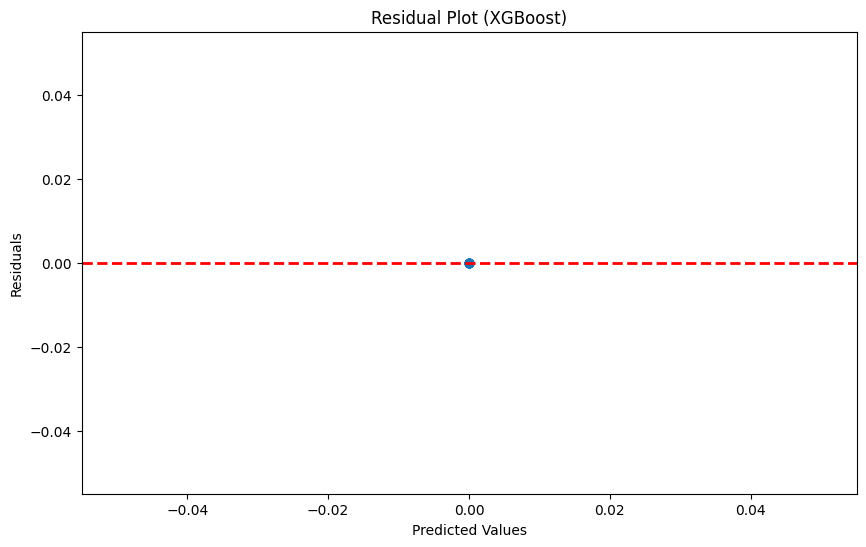

In [29]:
#calculate residuals 
residuals=y_val_split-y_val_pred_with_op

#plot residuals against predicated values 
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred_with_op, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()